In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import math

In [2]:
%%time
# make blank results df
results_df = pd.DataFrame(columns = ['n_clusters', 'cv_accuracy', 'final_accuracy', 'best_params'])
for n in [50, 100, 200, 300, 500]:
    # load data
    print('loading data')
    train_df = pd.read_csv('cluster_dfs/train_kmeans%s.csv'%n)
    test_df = pd.read_csv('cluster_dfs/test_kmeans%s.csv'%n)
    # make X and y
    feat_cols = ['cluster_%s'%i for i in range(0, n)]
    Xtrain = train_df[feat_cols].values
    Xtest = test_df[feat_cols].values
    ytrain = list(train_df['material'])
    ytest = list(test_df['material'])
    # grid search
    print('cv grid search:')
    forest_cv = model_selection.GridSearchCV(RandomForestClassifier(),
                                          {'n_estimators':[1000],
                                            'max_features':[math.floor(i) for i in np.linspace(2, n, 10)],
                                            'n_jobs':[4]},
                                            cv = 5,
                                            scoring = 'accuracy')
    forest_cv.fit(Xtrain, ytrain)
    forest_best_params = forest_cv.best_params_
    print(forest_best_params)
    for mean, std, params in zip(forest_cv.cv_results_['mean_test_score'],
                                forest_cv.cv_results_['std_test_score'],
                                forest_cv.cv_results_['params']):
        print('  random forest cv: \taccuracy = %0.3f (+/=%0.3f) for %s'%(mean, std*2, params))
    forest_pred_cv = forest_cv.predict(Xtest)
    forest_cv_accuracy = metrics.accuracy_score(ytest, forest_pred_cv)
    print('  cv accuracy on test data: %s'%forest_cv_accuracy)
    
    forest = RandomForestClassifier(n_estimators = 1000,
                                   max_features = forest_best_params['max_features'])
    # final model
    forest.fit(Xtrain, ytrain)
    forest_pred = forest.predict(Xtest)
    forest_accuracy = metrics.accuracy_score(ytest, forest_pred)
    print('final accuracy: %s'%forest_accuracy)
    # add to results df
    results = {
        'n_clusters':n,
        'cv_accuracy':forest_cv_accuracy,
        'final_accuracy':forest_accuracy,
        'best_params':forest_best_params
    }
    results_df = results_df.append(results, ignore_index=True)

loading data
cv grid search:
{'max_features': 18, 'n_estimators': 1000, 'n_jobs': 4}
  random forest cv: 	accuracy = 0.409 (+/=0.108) for {'max_features': 2, 'n_estimators': 1000, 'n_jobs': 4}
  random forest cv: 	accuracy = 0.421 (+/=0.099) for {'max_features': 7, 'n_estimators': 1000, 'n_jobs': 4}
  random forest cv: 	accuracy = 0.422 (+/=0.108) for {'max_features': 12, 'n_estimators': 1000, 'n_jobs': 4}
  random forest cv: 	accuracy = 0.440 (+/=0.121) for {'max_features': 18, 'n_estimators': 1000, 'n_jobs': 4}
  random forest cv: 	accuracy = 0.428 (+/=0.103) for {'max_features': 23, 'n_estimators': 1000, 'n_jobs': 4}
  random forest cv: 	accuracy = 0.430 (+/=0.094) for {'max_features': 28, 'n_estimators': 1000, 'n_jobs': 4}
  random forest cv: 	accuracy = 0.401 (+/=0.107) for {'max_features': 34, 'n_estimators': 1000, 'n_jobs': 4}
  random forest cv: 	accuracy = 0.423 (+/=0.084) for {'max_features': 39, 'n_estimators': 1000, 'n_jobs': 4}
  random forest cv: 	accuracy = 0.428 (+/=0.1

In [10]:
results_df

,n_clusters,cv_accuracy,final_accuracy,best_params
0,50,0.415415,0.423423,"{'max_features': 18, 'n_estimators': 1000, 'n_..."
1,100,0.383383,0.376877,"{'max_features': 12, 'n_estimators': 1000, 'n_..."
2,200,0.354354,0.352352,"{'max_features': 2, 'n_estimators': 1000, 'n_j..."
3,300,0.332332,0.334835,"{'max_features': 2, 'n_estimators': 1000, 'n_j..."
4,500,0.340340,0.344845,"{'max_features': 168, 'n_estimators': 1000, 'n..."


In [11]:
%%time
# best model run separately for confusion matrix
n = 50
# load data
print('loading data')
train_df = pd.read_csv('cluster_dfs/train_kmeans%s.csv'%n)
test_df = pd.read_csv('cluster_dfs/test_kmeans%s.csv'%n)
# make X and y
feat_cols = ['cluster_%s'%i for i in range(0, n)]
Xtrain = train_df[feat_cols].values
Xtest = test_df[feat_cols].values
ytrain = list(train_df['material'])
ytest = list(test_df['material'])
# grid search
print('cv grid search:')
forest_cv = model_selection.GridSearchCV(RandomForestClassifier(),
                                      {'n_estimators':[1000],
                                        'max_features':[math.floor(i) for i in np.linspace(2, n, 10)],
                                        'n_jobs':[4]},
                                        cv = 5,
                                        scoring = 'accuracy')
forest_cv.fit(Xtrain, ytrain)
forest_best_params = forest_cv.best_params_
print(forest_best_params)
for mean, std, params in zip(forest_cv.cv_results_['mean_test_score'],
                            forest_cv.cv_results_['std_test_score'],
                            forest_cv.cv_results_['params']):
    print('  random forest cv: \taccuracy = %0.3f (+/=%0.3f) for %s'%(mean, std*2, params))
forest_pred_cv = forest_cv.predict(Xtest)
forest_cv_accuracy = metrics.accuracy_score(ytest, forest_pred_cv)
print('  cv accuracy on test data: %s'%forest_cv_accuracy)

forest = RandomForestClassifier(n_estimators = 1000,
                               max_features = forest_best_params['max_features'])
# final model
forest.fit(Xtrain, ytrain)
forest_pred = forest.predict(Xtest)
forest_accuracy = metrics.accuracy_score(ytest, forest_pred)
print('final accuracy: %s'%forest_accuracy)

loading data
cv grid search:
{'max_features': 7, 'n_estimators': 1000, 'n_jobs': 4}
  random forest cv: 	accuracy = 0.415 (+/=0.087) for {'max_features': 2, 'n_estimators': 1000, 'n_jobs': 4}
  random forest cv: 	accuracy = 0.440 (+/=0.093) for {'max_features': 7, 'n_estimators': 1000, 'n_jobs': 4}
  random forest cv: 	accuracy = 0.422 (+/=0.101) for {'max_features': 12, 'n_estimators': 1000, 'n_jobs': 4}
  random forest cv: 	accuracy = 0.430 (+/=0.129) for {'max_features': 18, 'n_estimators': 1000, 'n_jobs': 4}
  random forest cv: 	accuracy = 0.432 (+/=0.116) for {'max_features': 23, 'n_estimators': 1000, 'n_jobs': 4}
  random forest cv: 	accuracy = 0.426 (+/=0.097) for {'max_features': 28, 'n_estimators': 1000, 'n_jobs': 4}
  random forest cv: 	accuracy = 0.434 (+/=0.114) for {'max_features': 34, 'n_estimators': 1000, 'n_jobs': 4}
  random forest cv: 	accuracy = 0.417 (+/=0.119) for {'max_features': 39, 'n_estimators': 1000, 'n_jobs': 4}
  random forest cv: 	accuracy = 0.419 (+/=0.11

In [17]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

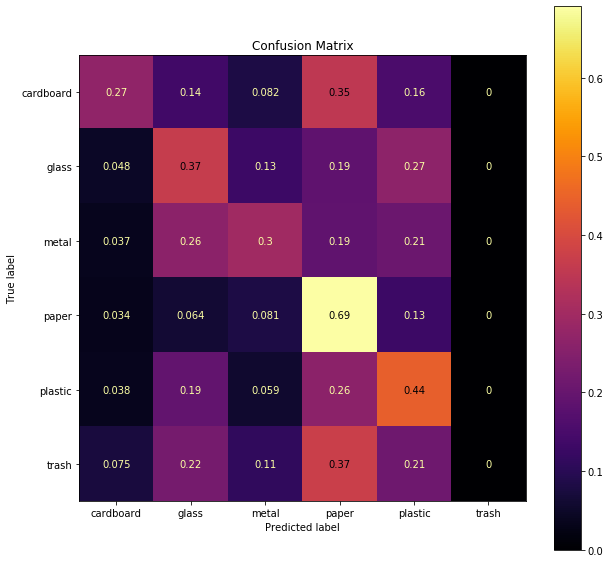

In [31]:
# confusion matrix
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.set_title('Confusion Matrix')
disp = plot_confusion_matrix(forest, Xtest, ytest, normalize='true', cmap='inferno', ax=ax)
plt.show()